80 Cereals


ABOUT THE DATASET ----- Fields in the dataset:

Name: Name of cereal

mfr: Manufacturer of cereal

A = American Home Food Products;

G = General Mills

K = Kelloggs

N = Nabisco

P = Post

Q = Quaker Oats

R = Ralston Purina

type: cold, hot

Calories: calories per serving

protein: grams of protein

fat: grams of fat

Sodium: milligrams of sodium

fiber: grams of dietary fiber

carbo: grams of complex carbohydrates

sugars: grams of sugars

potass: milligrams of potassium

vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended

shelf: display shelf (1, 2, or 3, counting from the floor)

weight: weight in ounces of one serving

cups: number of cups in one serving

rating: a rating of the cereals (Possibly from Consumer Reports?)

Acknowledgements
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic, and Yvonne Jansen. The source can be found here

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("cereal.csv")

In [4]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [10]:
cereals = df.copy()

In [11]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [12]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [13]:
cereals.shape

(77, 16)

In [14]:
cereals.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


Exploratory data analysis


Explore Categorical variables

In [15]:
print(cereals ['mfr'].value_counts())
print(cereals['type'].value_counts())

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64
type
C    74
H     3
Name: count, dtype: int64


visualize numerical variables

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

E:\Movies\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


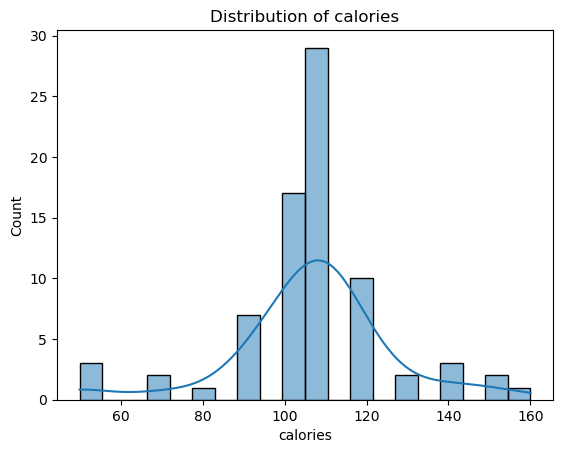

In [26]:
sns.histplot(df['calories'],bins = 20 ,kde=True)
plt.title("Distribution of calories")
plt.show()

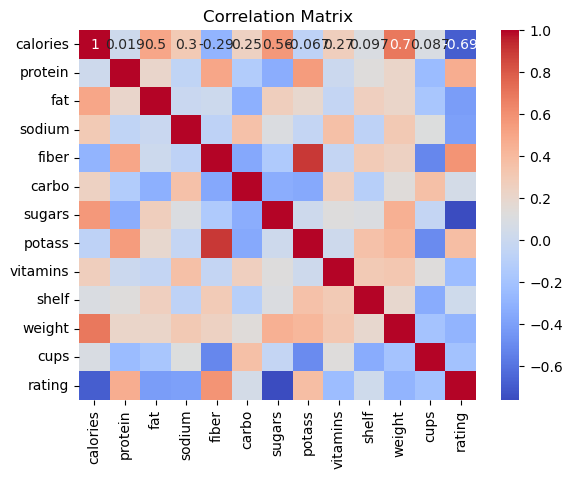

In [35]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

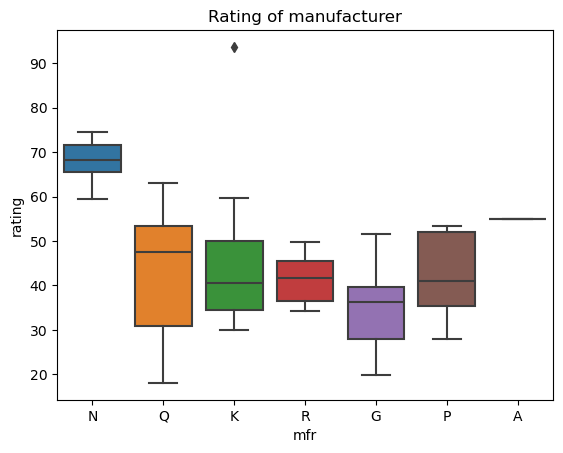

In [36]:
sns.boxplot(x ='mfr',y = 'rating' , data = df)
plt.title('Rating of manufacturer')
plt.show()

Insights

Top manufactuer

In [39]:
avg_rating_by_manufacturer = df.groupby('mfr')['rating'].mean().sort_values(ascending = True)
print(avg_rating_by_manufacturer)

mfr
G    34.485852
R    41.542997
P    41.705744
Q    42.915990
K    44.038462
A    54.850917
N    67.968567
Name: rating, dtype: float64


In [40]:
avg_rating_by_manufacturer = df.groupby('mfr')['rating'].mean().sort_values(ascending = False)
print(avg_rating_by_manufacturer)

mfr
N    67.968567
A    54.850917
K    44.038462
Q    42.915990
P    41.705744
R    41.542997
G    34.485852
Name: rating, dtype: float64


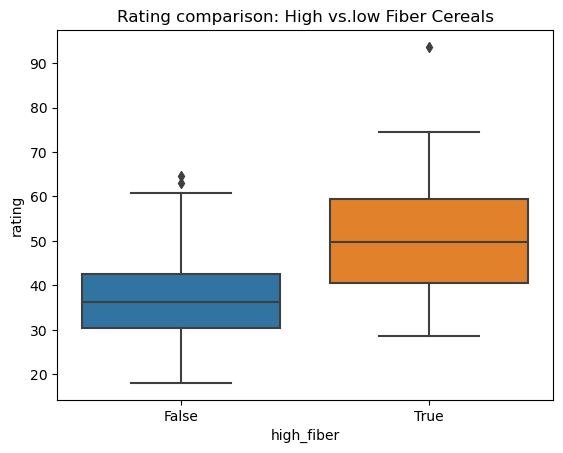

In [41]:
df['high_fiber'] = df['fiber'] > df['fiber'].median()
sns.boxplot(x = 'high_fiber', y = 'rating' , data = df)
plt.title('Rating comparison: High vs.low Fiber Cereals')
plt.show()

In [43]:
df['High_fiber'] = df['fiber'] > df['fiber'].median()
avg_rating_high_fiber = df.loc[df['high_fiber'],'rating'].mean()
avg_rating_low_fiber = df.loc[~df['high_fiber'],'rating'].mean()

print(f"Average rating for high fiber cereals: {avg_rating_high_fiber}")
print(f"Average rating for low fiber cereals: {avg_rating_low_fiber}")


Average rating for high fiber cereals: 50.931590620689654
Average rating for low fiber cereals: 37.671732416666664


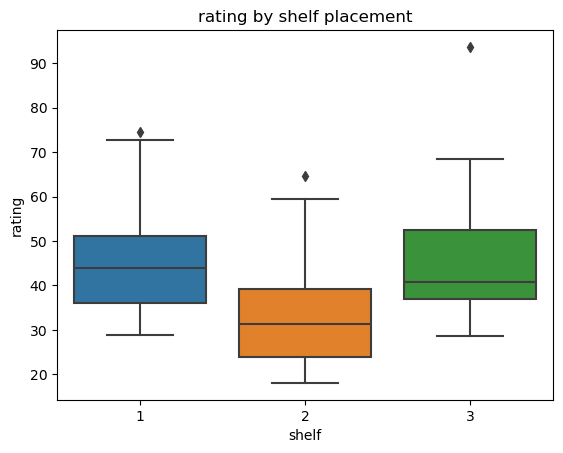

In [44]:
sns.boxplot(x ='shelf', y = 'rating' , data = df)
plt.title('rating by shelf placement')
plt.show()

In [45]:
avg_rating_by_shelf = df.groupby('shelf')['rating'].mean()
print("average ratings by shelf:")
print(avg_rating_by_shelf)

average ratings by shelf:
shelf
1    46.145439
2    34.972827
3    45.220032
Name: rating, dtype: float64


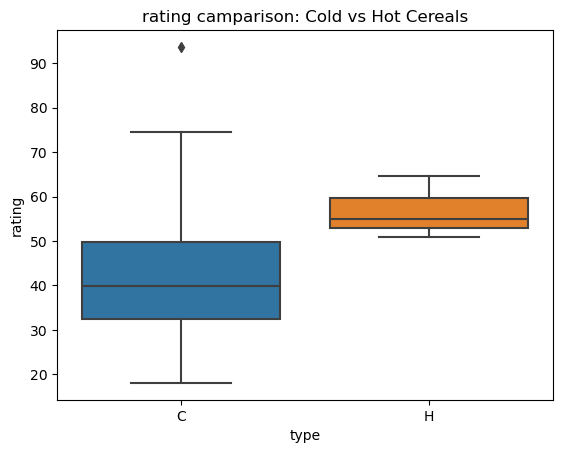

In [46]:
sns.boxplot(x = 'type' , y = 'rating' , data = df)
plt.title('rating camparison: Cold vs Hot Cereals')
plt.show()

In [47]:
avg_rating_by_type = df.groupby('type')['rating'].mean()
top_cereal_max = avg_rating_by_type.idxmax()
print(f"The cereal type with the highest average rating is: {top_cereal_max}")

The cereal type with the highest average rating is: H


In [48]:

# Calculate correlation coefficients
correlation_with_rating = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'rating']].corr()['rating']

# Display the correlation coefficients
print("Correlation between nutrients and rating:")
print(correlation_with_rating)

Correlation between nutrients and rating:
calories   -0.689376
protein     0.470618
fat        -0.409284
sodium     -0.401295
fiber       0.584160
carbo       0.052055
sugars     -0.759675
potass      0.380165
rating      1.000000
Name: rating, dtype: float64


In [51]:
correlation_calories_rating = df['calories'].corr(df['rating'])
print(f"correlation between calories and rating: {correlation_calories_rating}")

correlation between calories and rating: -0.6893760311652586
